3장

---

KNeighbors를 통한 이웃 회귀

#시작하기 전에

지도 학습 알고리즘은 크게 분류(classification)와 회귀(regression)으로 나뉜다.

분류는 말 그대로 샘플을 몇 개의 클래스 중 하나로 분류하는 문제이다.

---

회귀는 클래스 중 하나로 분류하는 것이 아니라 임의의 어떤 숫자를 예측하는 문제이다. ex) 내년도 경제 성장률, 배달이 도착할 시각 ...

회귀는 정해진 클래스가 없고 임의의 수치를 출력한다.

##Kneibors_algorithm
k-최근접 알고리즘

---



###k-최근접 이웃 알고리즘(KNeiborsClassifier)

이 알고리즘은 에측하려는 샘플에 가장 가까운 샘플 k개(default = 5)를 확인하여 다수 클래스를 새로운 샘플의 클래스로 정의한다.

---

새로운 샘플에서 가장 가까운 샘플들중에 0번 클래스가 더 다수라면 새로운 샘플을 0으로 예측

###k-최근접 이웃 회귀(KNeighborsRegressor)

---

KNeighbors를 사용하기 때문에 예측하려는 샘플에 가장 가까운 k개의 샘플을 선택하는데, 회귀이기 때문에 이웃한 샘플의 타깃은 어떤 클래스가 아니라 임의의 수치이다.

따라서 클래스가 아닌 값으로 본다는 것이고 가장 가까운 n개의 중간값이 결과로 나오게 된다.

#농어 길이, 무게 데이터 준비

In [ ]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

## 농어 길이, 무게 시각화

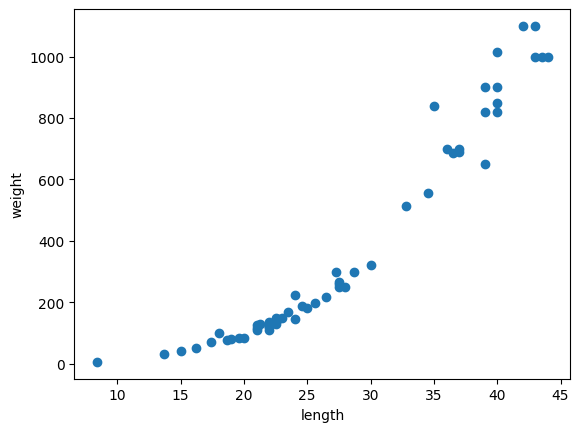

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel("length")
plt.ylabel("weight")

plt.show()

위 산점도를 통해서 길이와 무게는 어느정도 비례한다는 사실을 알 수 있음

#데이터 나누기

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

사이킷런에 필요한 데이터는 2차원 array여야하는데 앞선 데이터인 perch_length와 perch_weight는 1차원 데이터이기 떄문에 이런 1차원 배열을 1개의 열이 있는 2차원 배열로 나누어 주어야 한다.

---

선형으로 쭉 이어져있는 데이터의 경우에는 shape가 (len(array),)로 표현되는데
위 표현이 (len(array), 1)로 표현되어야 한다.

따라서 배열의 크기(shape)를 다시 바꿔줘야하는데 이는 numpy.reshape()를 통해서 할 수 있다.

## numpy.reshape()

In [ ]:
import numpy as np

test_array = np.array([1,2,3,4])
print(test_array)
# test_array의 크기 출력
print(test_array.shape)

# test_array의 크기 재설정
test_array = test_array.reshape(2, 2)
print(test_array.shape)

# 배열의 출력 변화 확인
print(test_array)


# test_array1 = np.array([1,2,3,4,5])

# test_array1.shape
# test_array1.reshape(2,3)

[1 2 3 4]
(4,)
(2, 2)
[[1 2]
 [3 4]]


##기존의 column_stack과의 비교

---

기존의 column_stack으로 length와 weight를 합치고 train_test_split으로 나눠봐도 shape는 여전히 1차원으로 나오는것을 알 수 있음

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np


perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

perch_data = np.column_stack((perch_length, perch_weight))

train_input, test_input, train_target, test_target = train_test_split(perch_data[:, 0], perch_data[:, 1], random_state = 42)

### 적용

---

train_input과 test_input을 2차원 배열로 바꾸는 작업을 진행하는데

직관적으로 생각하기에는 배열의 길이를 넣는것인데

a = len(test_array)

test_array.reshape(a, 1)

와 같은 식이다.


numpy에서는 배열의 크기를 자동으로 지정하는 기능도 제공하는데, **크기에 -1**을 지정하면 나머지 원소 개수로 모두 채워진다.


In [ ]:
import numpy as np

print(len(train_input))

#len으로 배열의 길이 확인 후에 reshape하는 경우
train_input.reshape(42, 1)

print(train_input.shape)

#-1을 통해서 자동으로 크기를 정하는 경우
train_input.reshape(-1, 1)

print(train_input.shape)

42
(42,)
(42,)


위와 같이 -1을 사용하면 len으로 길이를 알지 못해도 간단하게 1차원 배열을 2차원 배열로 만들어줄 수 있다.

In [ ]:
train_input = train_input.reshape(-1, 1)

test_input = test_input.reshape(-1, 1)

print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


reshape의 경우 배열의 사이즈가 일치해야하는데 일치하지 않으면 오류가 발생한다.

#결정계수(R^2)

---

사이킷런에서 k-최근접 이웃 회귀 알고리즘을 구현한 클래스는 KNeighborsRegressor이다.

이 클래스의 사용법은 KNeighborsclassifier과 매우 유사하다.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

knr.score(test_input, test_target)

0.992809406101064

## 회귀와 분류의 score차이

---

KNeighborsClassifier과 KNeighborsRegressor의 차이에 대해서

분류의 경우에는 테스트 세트(test_input, test_target)에 있는 샘플을 정확하게 분류한 개수의 비율이고 이를 **정확도(accuracy)**라고 한다.

---

회귀의 경우에는 정확한 숫자를 맞힌다는 것은 거의 불가능하기 때문에 예측하는 값이나 타깃 모두 임의의 수치이다. 회귀에서는 조금 다른 값으로 평가하는데 이 점수를 **결정계수**(coefficient of determination) 또는 R이라 부른다.

##R의 계산 식

---

$$R^2=1-\frac{\sigma(Target - Predict)^2}{σ(Target - Mean)^2}$$

---

각 샘플의 타깃과 예측한 값의 차이를 제곱하여 더하고, 타깃과 평균의 차이를 제곱하여 더한 값으로 나눈다.  만약 타겟의 평균정도를 예측하는 수준이라면 결졍계수는 0에 가까워지고, 예측이 타깃에 아주 가까워지면 결정계수는 1에 가까운 값이 된다.

##mean_absolute_error

---

sklearn.metrics패키지 아래 mean_absolute_error는 타깃과 예측의 절댓값 오차를 평균하여 반환한다.

In [ ]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측 만들기

test_prediction = knr.predict(test_input)

print(knr.predict(test_input))

mae = mean_absolute_error(test_target, test_prediction)

print(mae)

[  60.    79.6  248.   122.   136.   847.   311.4  183.4  847.   113.
 1010.    60.   248.   248. ]
19.157142857142862


위 결과값은 평균적으로 19g정도 target값과 다르다는 것을 알 수 있다. target데이터와 predict데이터의 절댓값 오차를 평균하여 반환함으로서 어느 정도 예측이 벗어났는지 가늠할 수 있다.


#과대적합 vs 과소적합

In [ ]:
print(knr.score(train_input, train_target))

0.9698823289099254


위 결과를 확인하면 test데이터를 넣었을때보다 오히려 train데이터를 넣었을 떄 score이 더 낮아진것을 확인할 수 있다.

##과대적합

---

만약 훈련세트에서 점수가 굉장히 좋았는데 테스트 세트에서는 점수가 굉장히 나쁘다면 모델이 훈련 세트에 과대적합(overfitting)되었다고 말한다.

죽, 훈련세트에만 잘 맞는 모델이라 테스트 세트와 나중에 실전에 투입하여 새로운 샘프에 대한 예측을 만들 때 잘 동작하지 않을 가능성이 있다.

##과소적합

---

훈련세트를 통해서 모델을 훈련시키는데 훈련세트에서 더 좋은 점수가 나오지 않고 테스트 세트에서 더 좋은 점수가 나오거나 두 세트 모두 점수가 낮은 경우에는 과소적합(underfitting)이라한다.


즉, 모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않은 경우이다.

##모델 수정하기

---

위 모델(knr)은 과소적합에 해당하기 때문에 모델을 조금 더 복잡하게 만들면 된다.
k-최근접 이웃 알고리즘의 경우 이웃을 개수를 조절하면서 더 복잡하거나 단순하게 만들어줄 수 있다.

In [ ]:
# 이웃의 개수 설정하기
knr.n_neighbors = 3

# 모델을 다시 훈련

knr.fit(train_input, train_target)

print(knr.score(train_input, train_target), knr.score(test_input, test_target))

0.9804899950518966 0.9746459963987609


예상대로 테스트 세트의 점수는 훈련 세트보다 낮아졌으므로 과소적합 문제를 해결하였다.

#고찰

---


k-최근접 이웃 알고리즘은 이웃의 샘플의 평균을 이 샘플의 예측값으로 사용한다.
이 알고리즘은 점수를 사이킷런은 결정계수로 반환하고 값은 1에 가까울 수록 좋다.

만일 점수만으로 모델의 오차에 대해서 잘 못느낀다면 절대값 오차를 평균하여 반환하는 mean_absolute_error를 통해서 가능하다.

train세트와 test세트의 점수와 둘의 점수 오차를 통해서 과대적합(overfitting)인지, 과소적합(underfitting)인지 판단 내릴 수 있고, 그에 따라서 알고리즘을 복잡하게 하거나 단순하게 바꿔서 그 문제를 해결할 수 있다.

k-최근접 이웃 알고리즘(KNeighborsRegressor)의 경우에는 이웃의 개수를 통해서 복잡하거나 단순하게 바꿀 수 있다.

#마무리

---

과대적합과 과소적합에 대한 이해를 돕기 위해 복잡한 모델과 단순한 모델을 만들고 k-최근접 이웃 회귀 모델의 k 값을 1, 5, 10으로 바꿔가며 훈련

(40, 1)
[ 5 10 15]


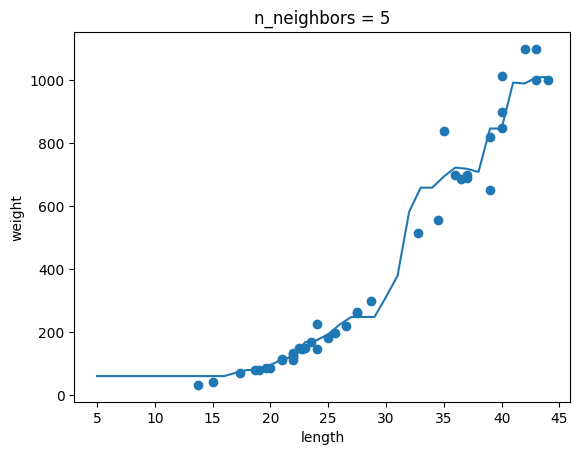

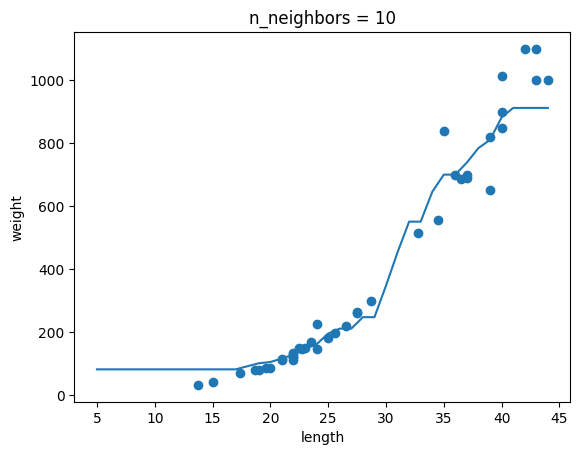

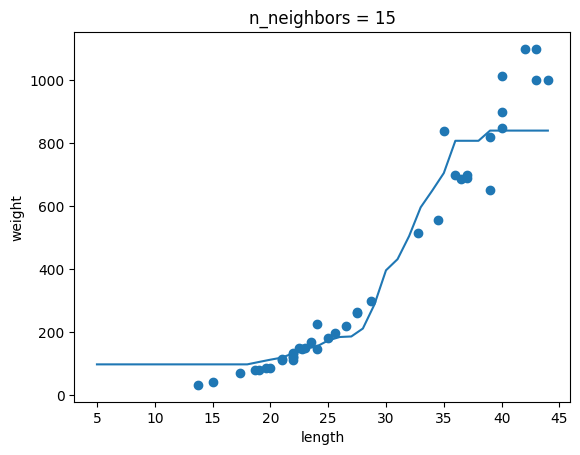

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

#데이터 나누기
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

#데이터 reshape하기
train_input = train_input.reshape(-1, 1)
train_target = train_target.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
test_target = test_target.reshape(-1, 1)


#k-최근접 이웃 회귀 객체를 만들기
knr = KNeighborsRegressor()

# 5에서 45까지 x 좌표를 만든다.

x = np.arange(5, 45).reshape(-1, 1)


print(x.shape)


array_n = np.arange(5, 16, 5)
print(array_n)
# n = 1, 5, 10일 떄 예측 결과를 그래프로 그리기
for n in array_n:
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  # 지정된 x 범위에 대한 예측 구하기
  prediction = knr.predict(x)

  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.title('n_neighbors = {}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()


위 결과를 통해서 n_neighbors(이웃값의 개수)이 예측값에 미치는 영향을 시각적으로 알 수 있었다.

참고하는 이웃값이 적을수록 변화에 더욱더 민감하게 반응하고 이웃값이 많을수록 더욱더 완만한것을 볼 수 있다.